In [1]:
import numpy as np
import scipy as sp
from sklearn.metrics import r2_score

import perfect_art.statistics as st
import perfect_art.series as s
import perfect_art.graphics as g

import matplotlib.pyplot as plt

import main as m

In [3]:
sample_size = 1000
q = 0.01
length = 750
n_days = 10

alpha = 1.7
beta = 0
gamma = 1
delta = 1 

r2_cutoff = 0.990
max_iter = np.inf
min_drop_size = 10

simulation_params = sample_size, q, length, n_days, alpha, beta, gamma, delta, r2_cutoff, max_iter, min_drop_size

In [5]:
_series = s.ReturnSeries(length, n_days)
_series.generate()

one_day_freqs, one_day_bins, one_day_edges = st.get_distrubution(_series.one_day_returns_values)
n_days_freqs, n_days_bins, n_days_edges = st.get_distrubution(_series.n_days_returns_values)

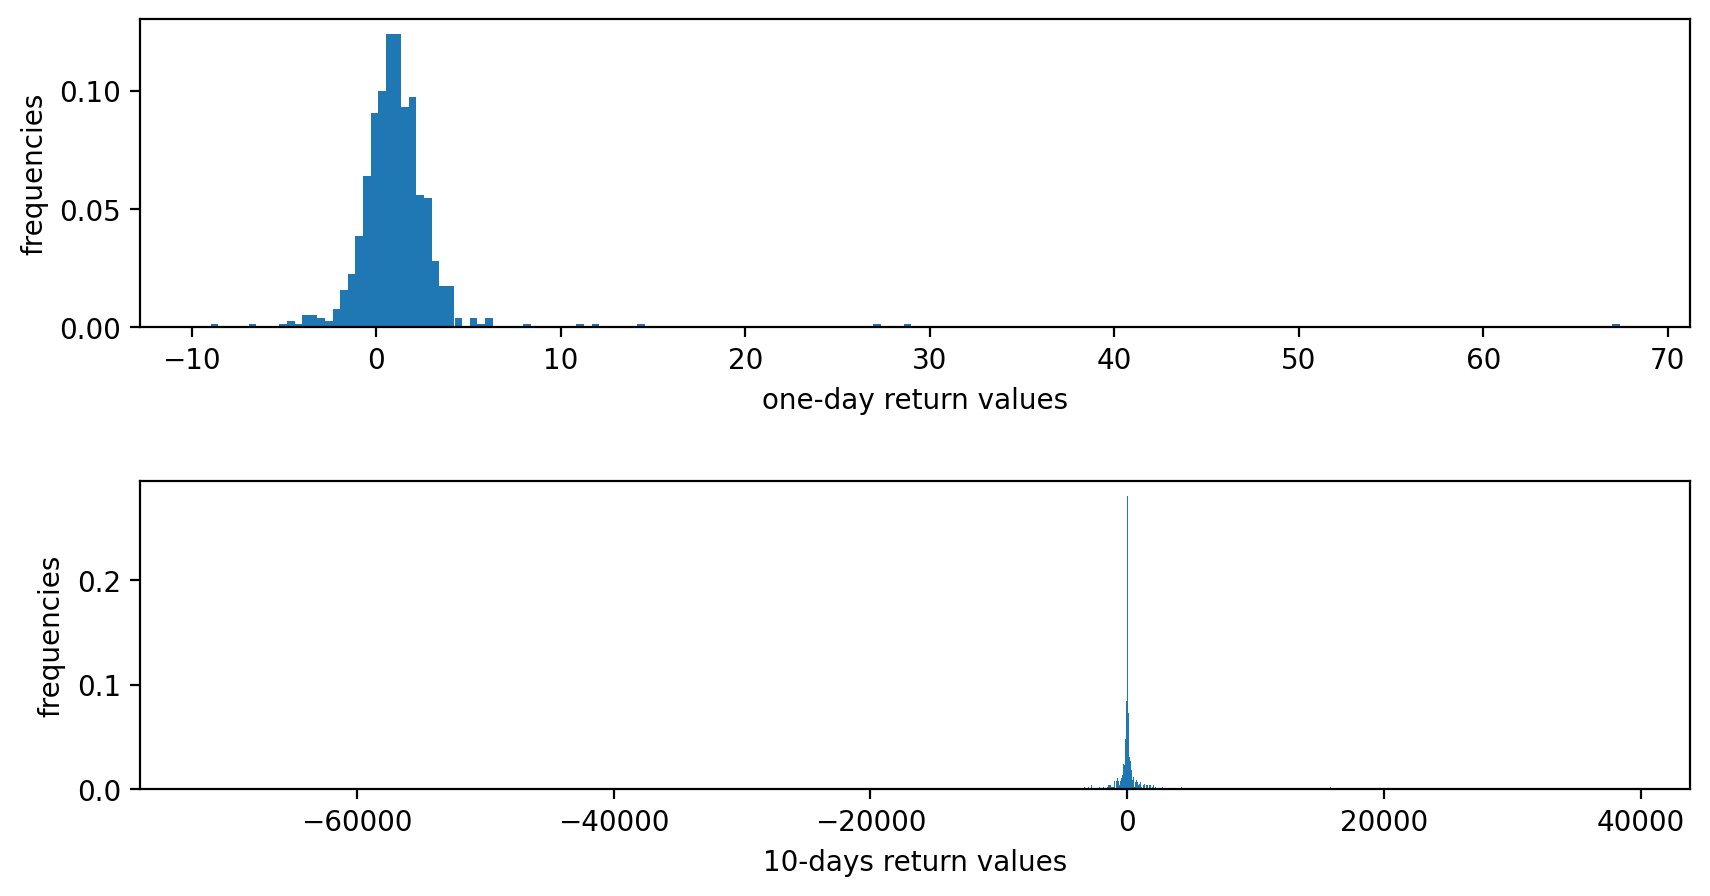

In [6]:
fig = plt.figure(figsize=(10,5), dpi=200)

ax_one_day = fig.add_subplot(211)
ax_n_days = fig.add_subplot(212)

days = np.linspace(0,length-1,1)

width = lambda arr: abs(np.max(arr) - np.min(arr))/len(arr)

ax_one_day.bar(one_day_bins,one_day_freqs, width=width(one_day_bins))
ax_n_days.bar(n_days_bins,n_days_freqs, width=width(n_days_bins))

ax_one_day.set_xlabel('one-day return values')
ax_one_day.set_ylabel('frequencies')

ax_n_days.set_xlabel('10-days return values')
ax_n_days.set_ylabel('frequencies')

plt.subplots_adjust(hspace=0.5)



In [4]:
percentiles, means, N, steps, r2_t, mean_t, var_t = m.simulation(*simulation_params)

In [5]:
perc_freqs, pesc_bins, perc_edges = st.get_distribution(percentiles)
perc_cdf = np.cumsum(perc_freqs)

means_freqs, means_bins, means_edges = st.get_distribution(means)
means_cdf = np.cumsum(means_freqs)

true_porm_pdf = sp.stats.norm.pdf(means_bins, loc=mean_t[-1], scale=var_t[-1]/np.sqrt(N))
true_porm_cdf = sp.stats.norm.cdf(means_bins, loc=mean_t[-1], scale=var_t[-1]/np.sqrt(N))

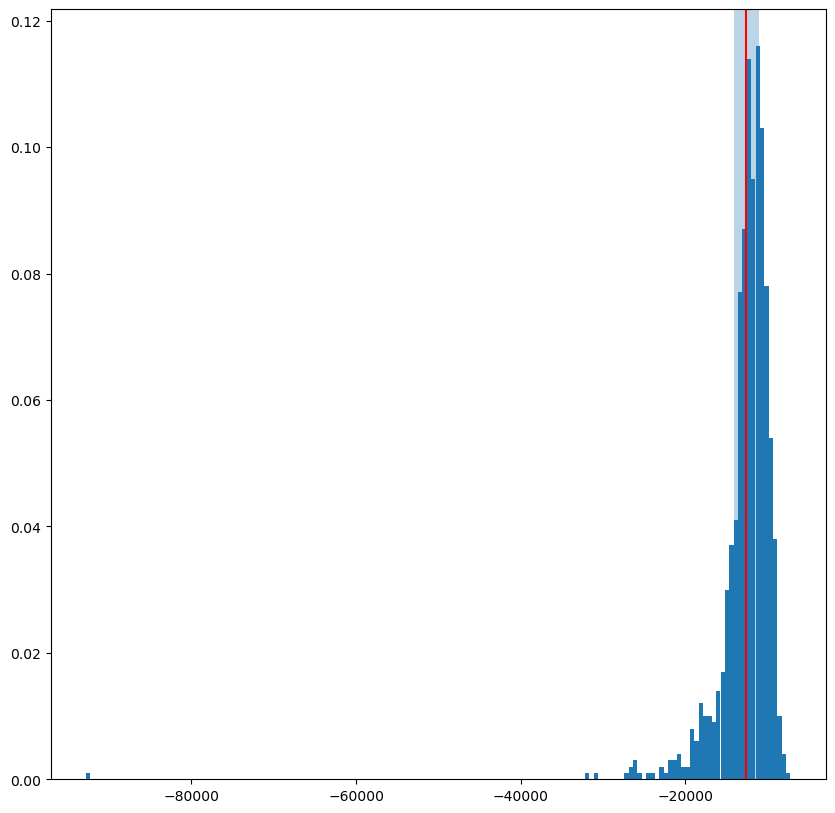

In [8]:
fig = plt.figure(figsize=(10,10), dpi=100)

ax = fig.add_subplot(111)
total_mean, total_var = mean_t[-1], var_t[-1]
width = lambda arr:abs(np.max(arr) - np.min(arr)) / len(arr)
ax.bar(means_bins, means_freqs, width=width(means_bins))
ax.axvline(total_mean, color='red')

ax.axvspan(total_mean - total_var/np.sqrt(N), total_mean + total_var/np.sqrt(N), alpha=0.3)
#ax.bar(bins, cum_norm, width=500, alpha=0.5)

In [293]:
freqs, bins, edges = statistics.get_distrubution(np.concatenate(percentiles))


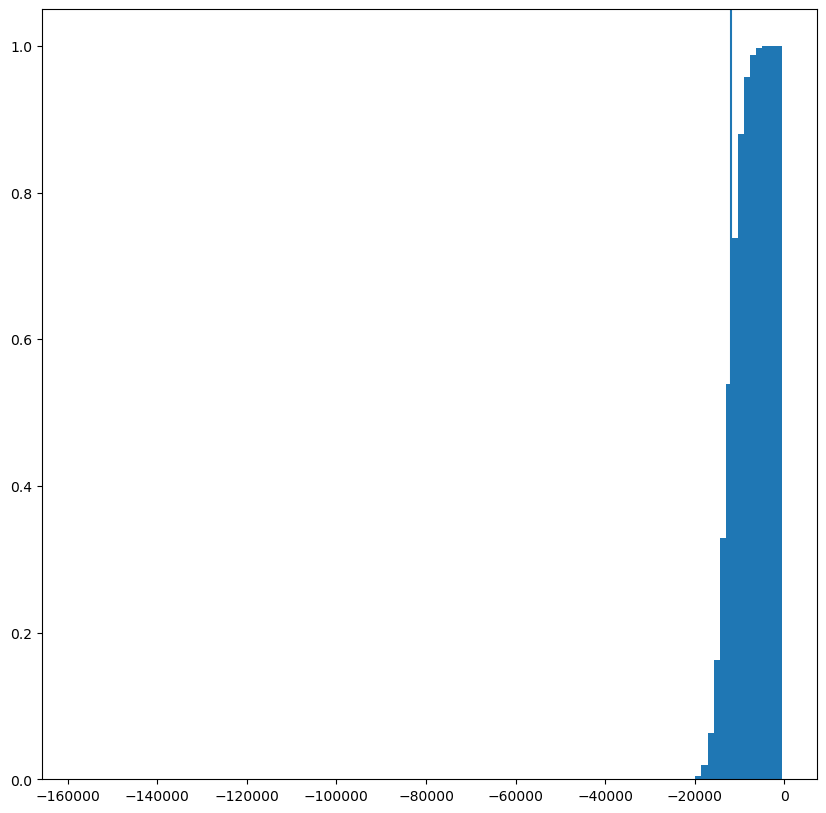

In [224]:
fig = plt.figure(figsize=(10,10), dpi=100)

ax = fig.add_subplot(111)

ax.bar(bins, sp.stats.norm.cdf(bins, loc=total_mean, scale=total_var/np.sqrt(N)), width=3000)
ax.axvline(total_mean)

In [9]:
for i, n in enumerate(['a','b','c']):
    print(i,n)

0 a
1 b
2 c


In [ ]:
frequencies, bins, edges = statistics.get_distrubution(Perc)
frequencies, bins

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=100)

ax = fig.add_subplot(111)

ax.bar(bins,frequencies, width=1000)

In [8]:
A = [[1,2,3],[4,5,6]]
B = [[7,8,9],[10,11,12]]
C = ['s','d']

for (a,b,c) in zip(A,B,C):
    print(a,b,c)

[1, 2, 3] [7, 8, 9] s
[4, 5, 6] [10, 11, 12] d
